In [17]:
#Este archivo se utiliza únicamente para dar respuesta a las preguntas que se piden con la entrega del proyecto.

In [18]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd
import numpy as np
%matplotlib inline

In [19]:
#Primero agregamos la ruta a los archivos src y reports, donde guardamos las funciones generadas y las figuras que sacamos de main
import os, sys
ruta = os.path.dirname(os.getcwd())
sys.path.append(ruta)

['c:\\Users\\Adrià\\Desktop\\Thebridge\\adria_gallardo_thebridge_ds\\Proyectos\\EDA\\notebooks',
 'c:\\Users\\Adrià\\.vscode\\extensions\\ms-toolsai.jupyter-2021.6.832593372\\pythonFiles',
 'c:\\Users\\Adrià\\.vscode\\extensions\\ms-toolsai.jupyter-2021.6.832593372\\pythonFiles',
 'c:\\Users\\Adrià\\.vscode\\extensions\\ms-toolsai.jupyter-2021.6.832593372\\pythonFiles\\lib\\python',
 'C:\\Users\\Adrià\\AppData\\Local\\Programs\\Python\\Python37\\python37.zip',
 'C:\\Users\\Adrià\\AppData\\Local\\Programs\\Python\\Python37\\DLLs',
 'C:\\Users\\Adrià\\AppData\\Local\\Programs\\Python\\Python37\\lib',
 'C:\\Users\\Adrià\\AppData\\Local\\Programs\\Python\\Python37',
 '',
 'C:\\Users\\Adrià\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\Adrià\\AppData\\Roaming\\Python\\Python37\\site-packages\\win32',
 'C:\\Users\\Adrià\\AppData\\Roaming\\Python\\Python37\\site-packages\\win32\\lib',
 'C:\\Users\\Adrià\\AppData\\Roaming\\Python\\Python37\\site-packages\\Pythonwin',
 'C:\\

In [20]:
import src.utils.mining_data_tb as mn

In [21]:
#Para comenzar, obtenermos nuestro DataFrame limpio.
data = pd.read_json((".." + os.sep + "reports" + os.sep + "from_main" + os.sep + "cleaned_data.json"), orient="split")
data

,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,traveltime,...,nursery,higher,internet,romantic,famrel,freetime,goout,absences,alcohol,grade
0,F,18,U,GT3,A,4,4,course,mother,2,...,yes,yes,no,no,4,3,4,6,2,17
1,F,17,U,GT3,T,1,1,course,father,1,...,no,yes,yes,no,5,3,3,4,2,16
2,F,15,U,LE3,T,1,1,other,mother,1,...,yes,yes,yes,no,4,3,2,10,5,25
3,F,15,U,GT3,T,4,2,home,mother,1,...,yes,yes,yes,yes,3,2,2,2,2,44
4,F,16,U,GT3,T,3,3,home,father,1,...,yes,yes,no,no,4,3,2,4,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,F,19,R,GT3,T,2,3,course,mother,1,...,no,yes,yes,no,5,4,2,4,3,31
1011,F,18,U,LE3,T,3,1,course,mother,1,...,yes,yes,yes,no,4,3,4,4,2,46
1012,F,18,U,GT3,T,1,1,course,mother,2,...,yes,yes,no,no,1,1,1,6,2,32
1013,M,17,U,LE3,T,3,1,course,mother,2,...,no,yes,yes,no,2,4,5,6,7,30


<AxesSubplot:xlabel='age', ylabel='Count'>

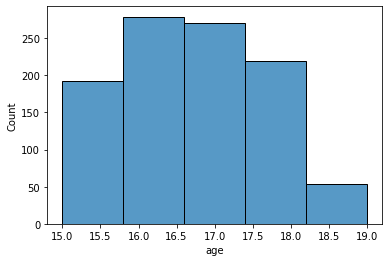

In [22]:
#Pregunta: Muestra el histograma de cada columna en tu dataset con bins=5. ¿Como están los rangos pintados?

#Primer intento
sns.histplot(data=data["age"], bins=5)

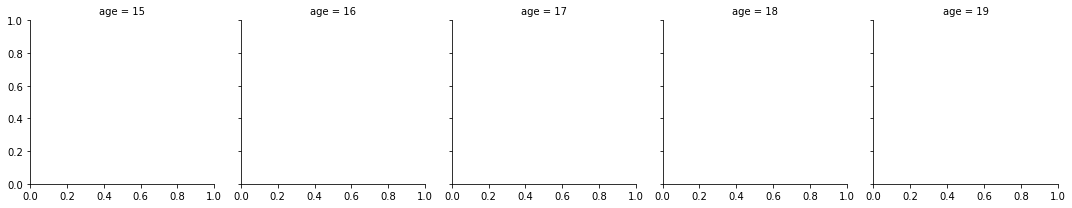

In [23]:
#Segundo intento
g = sns.FacetGrid(data, col= "age")
g.map(sns.histplot)

In [24]:
#Tercer intento. Pesa demasiado, se queda como comentario para no ejecutarse.
#data.plot(subplots=True, layout= (5,6), kind= "bar")


In [25]:
#Cuarto intento. Pesa demasiado, se queda como comentario para no ejecutarse.
#data.plot(subplots=True, layout= (5,6), kind= "bar")
#ax = plt.hist(data, bins=5)
#plt.figure(figsize=(12,9))


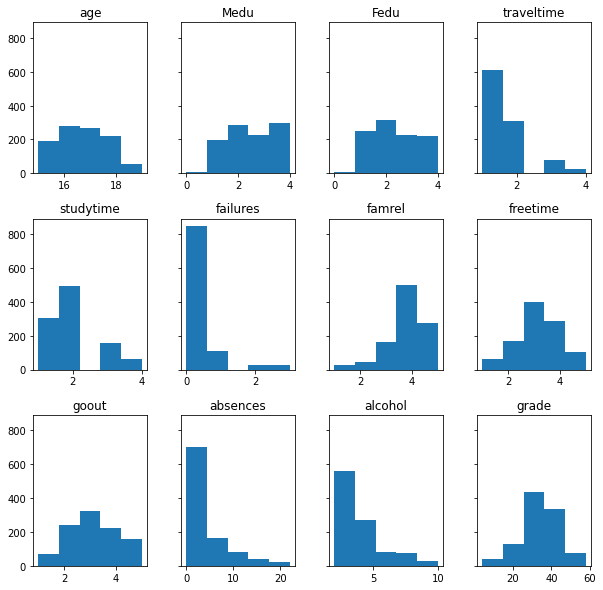

In [26]:
#Ultimo intento, con esta gráfica se puede responder la pregunta. Se guarda en la carpeta images que se encuentra en reports.
a = data.hist(bins=5, layout = (3,4), figsize=(10,10), grid=False, sharey = True)
plt.savefig(".." + os.sep + "reports" + os.sep + "images" + os.sep + "bins5_graph.jpg")

In [27]:
#Pregunta:¿Cuales son las columnas con mayor correlación? Dibuja una matriz de correlación.
#Para resolver esta pregunta, se toman los datos binarios de objeto como binarios numéricos. Para ello, se coje el data limpio con binarios cambiados que se encuentra en reports.
data_binary = pd.read_json((".." + os.sep + "reports" + os.sep + "from_main" + os.sep + "cleaned_data_binary.json"), orient="split")
data_binary

,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,traveltime,...,nursery,higher,internet,romantic,famrel,freetime,goout,absences,alcohol,grade
0,1,18,1,1,1,4,4,course,mother,2,...,1,1,1,1,4,3,4,6,2,17
1,1,17,1,1,0,1,1,course,father,1,...,0,1,0,1,5,3,3,4,2,16
2,1,15,1,0,0,1,1,other,mother,1,...,1,1,0,1,4,3,2,10,5,25
3,1,15,1,1,0,4,2,home,mother,1,...,1,1,0,0,3,2,2,2,2,44
4,1,16,1,1,0,3,3,home,father,1,...,1,1,1,1,4,3,2,4,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,1,19,0,1,0,2,3,course,mother,1,...,0,1,0,1,5,4,2,4,3,31
1011,1,18,1,0,0,3,1,course,mother,1,...,1,1,0,1,4,3,4,4,2,46
1012,1,18,1,1,0,1,1,course,mother,2,...,1,1,1,1,1,1,1,6,2,32
1013,0,17,1,0,0,3,1,course,mother,2,...,0,1,0,1,2,4,5,6,7,30


<AxesSubplot:>

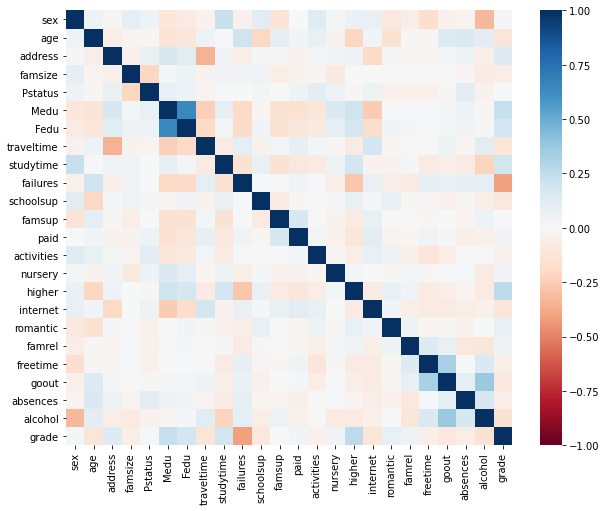

In [28]:
#Intento 1. Se dibuja el mapa de calor que nos enseña las correlaciones. Como se puede observar, hay muchas columnas y es dificil apuntar los valores con mayor correlación.
plt.figure(figsize=(10,8))
sns.heatmap(data_binary.corr(), cmap="RdBu", vmin=-1, vmax=1)

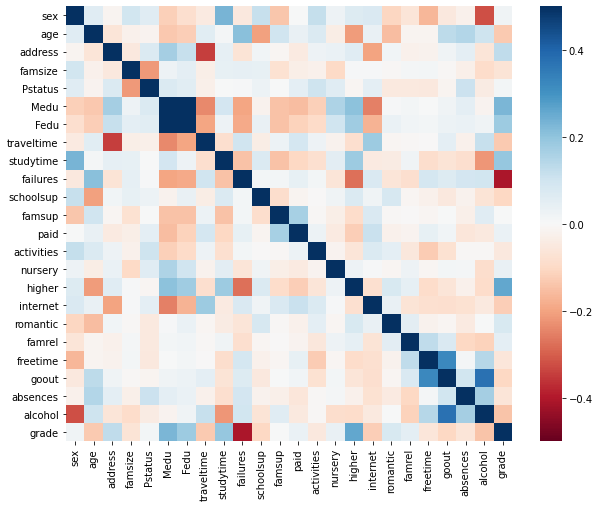

In [29]:
#Se dibuja un segundo mapa de calor con valores máximos reducidos para facilitar la visualización de los valores con mayor correlación. Con esta imagen se puede responder la pregunta. Se guarda en la carpeta images en reports.

plt.figure(figsize=(10,8))
sns.heatmap(data_binary.corr(), cmap="RdBu", vmin=-0.5, vmax=0.5)
plt.savefig(".." + os.sep + "reports" + os.sep + "images" + os.sep + "correlation_graph.jpg")

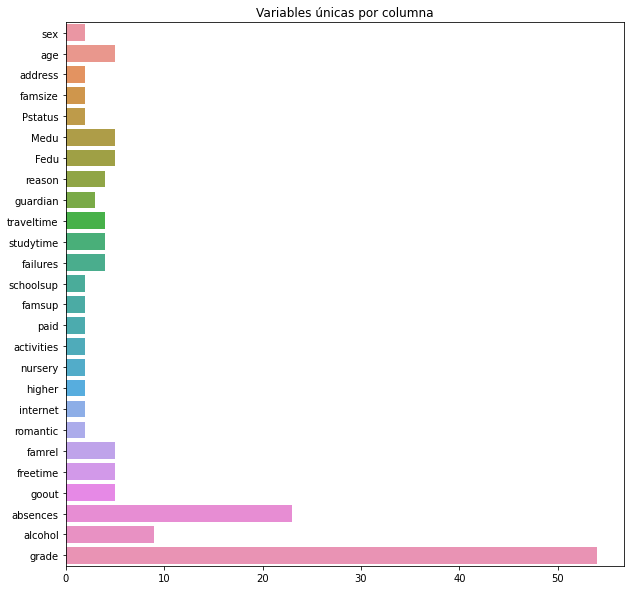

In [30]:
#¿Qué columnas tienen más valores repetidos? Se extrapola un conteo de valores únicos de cada columna a un Series y se elabora una gráfica con ese Series.Con esta imagen se puede responder la pregunta. Se guarda en la carpeta images en reports.

ser = mn.get_unique_counts(data)

plt.figure(figsize=(10,10))
sns.barplot(x=ser.values, y=ser.index)
plt.title("Variables únicas por columna")
plt.savefig(".." + os.sep + "reports" + os.sep + "images" + os.sep + "values_frequency.jpg")